# Goal
The goal here is to figure out how to calculate what the angle of the rocket should be relative to several coordinate systems. We shall set the angle relative to the direction of the center of the earth. Then convert it to a coordinate system that is centered on the rocket and parallel to the main coordinate system, which is centered on the center of the earth.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from modsim import *
from gnc import get_gnc

params = Params(
    earth_diameter = 12756000
)
height = 30000 * 1000
time = 500

P = Vector(0 ,(0.5 * params.earth_diameter) + height)
gnc = get_gnc(time, P, params)

set_point = pol2cart(gnc.facing, vector_mag(P))
SP = P + Vector(set_point[0], set_point[1])

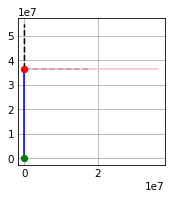

In [12]:




plt.style.use('_mpl-gallery')

axis_length = 0.5 * vector_mag(P)
r_axis_x = np.arange(P.x, P.x+axis_length, 1)
r_axis_y = np.arange(P.y, P.y+axis_length, 1)

# plot
fig, ax = plt.subplots()

ax.plot(r_axis_x, np.repeat(P.y, len(r_axis_x)), linestyle='--', color='black')
ax.plot(np.repeat(P.x, len(r_axis_y)), r_axis_y, linestyle='--', color='black')

ax.plot([0, P.x], [0, P.y], color='blue')
ax.plot([P.x, SP.x], [P.y, SP.y], color='pink')

ax.plot(P.x, P.y, 'o', color='red')
ax.plot(0, 0, 'o', color='green')

# ax.set(xlim=(0, 8), xticks=np.arange(-20, 21, 10),
#        ylim=(0, 8), yticks=np.arange(-20, 21, 10))

plt.show()